# Les graphes et la visualisation avec Plots.jl

In [1]:
using Plots


(process:17908): GLib-GIO-WARNING **: 18:25:16.561: Unexpectedly, UWP app `Clipchamp.Clipchamp_2.2.10.0_neutral__yxz26nhyzhsrt' (AUMId `Clipchamp.Clipchamp_yxz26nhyzhsrt!App') supports 46 extensions but has no verbs


## Un graphe vide

L'appel de la méthode `plot()` renvoie un graphe, vide si aucun argument n'est spécifié, et le stocke dans la variable retournée par `current()`.

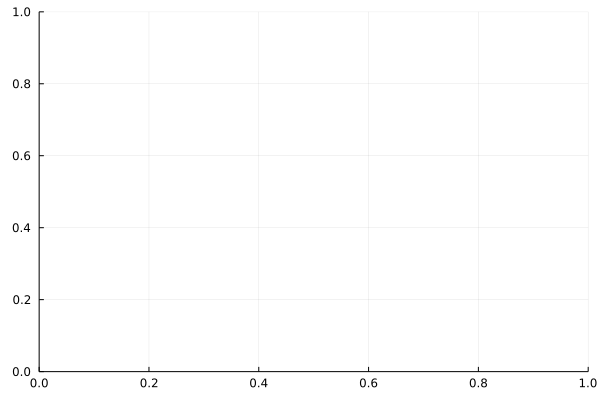

In [2]:
plot()

## Les données

Les données d'un graphe sont des arguments de `plot()`, pas des mot-clefs. Cette fonction a différents comportements selon le nombre d'arguments spécifiés

- `plot(y)` crée un graphe 2.D dont les valeurs de `x` sont construites automatiquement,
- `plot(x, y)` crée un graphe 2.D,
- `plot(x, y, z)` crée un graphe 3.D.

Regardons lorsque `y` est une simple série de nombres, i.e un `Array` de dimension un.

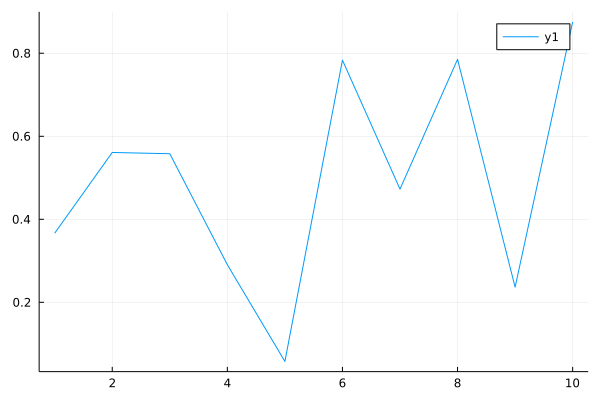

In [3]:
y = rand(10)
plot(y)

En fait, il est tout aussi adapté de considérer le nuage de points sans interpolation : sans ligne les liant entre eux.

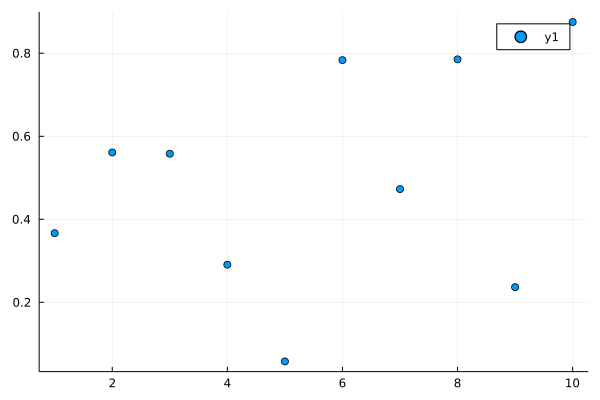

In [4]:
scatter(y)

On regarde maintenant le cas où $x \in [0,1]$ et $y = e^x$.

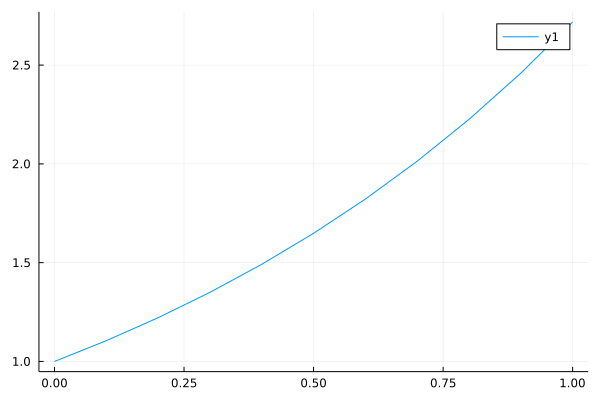

In [5]:
x = 0:0.1:1
plot(x, exp)

Enfin, observons un nuage de points à trois dimensions construit aléatoirement.

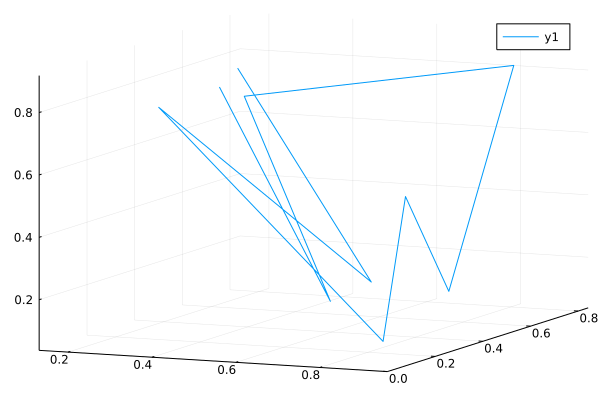

In [6]:
x = rand(10)
y = rand(10)
z = rand(10)
plot(x, y, z)

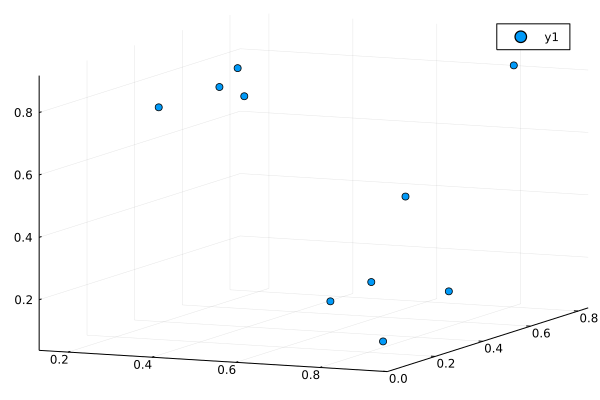

In [7]:
scatter3d(x, y, z)

Lorsque $y$ représente une matrice à $m$ lignes et $n$ colonnes, `plot()` interprète chaque colonne comme une série indépendante.

In [8]:
y = rand(10, 4)
y

10×4 Matrix{Float64}:
 0.275165   0.45531   0.408733  0.00366467
 0.158706   0.284262  0.986965  0.343029
 0.50869    0.89716   0.537659  0.28723
 0.580813   0.925372  0.300275  0.119359
 0.511176   0.962994  0.729261  0.576037
 0.62277    0.777482  0.254262  0.705889
 0.433612   0.890353  0.433753  0.884908
 0.665307   0.840795  0.394881  0.179259
 0.0274746  0.116486  0.396872  0.66531
 0.548603   0.778504  0.935801  0.847982

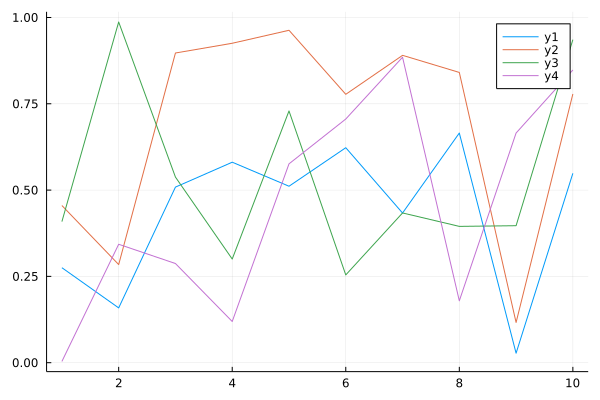

In [9]:
plot(y)

L'argument `y` peut aussi être une fonction. Dans ce cas, `plot(x, y)` construit la série numérique `y.(x)` et la trace.

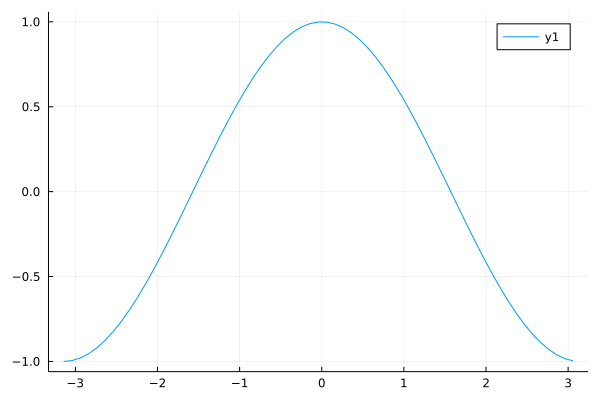

In [10]:
x = -π:0.1:π
y = cos
plot(x, y)

`y` peut être un vecteur de fonctions : `plot()` affiche alors la courbe paramétrée par `x`, dont les valeurs sont les points du plan - ou de l'espace - `y.(x)` avec $$ y : x \mapsto \begin{bmatrix} y^1(x) \\ y^2(x) \end{bmatrix} $$

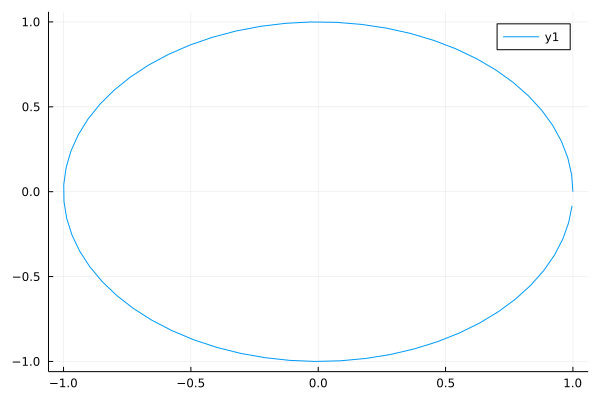

In [11]:
x  = 0:0.1:2π
y¹ = cos
y² = sin
plot(y¹, y², x)

En trois dimensions, une courbe paramétrée $y$ s'écrit $$ y : x \mapsto \begin{bmatrix} y^1(x) \\ y^2(x) \\ y^3(x) \end{bmatrix} $$

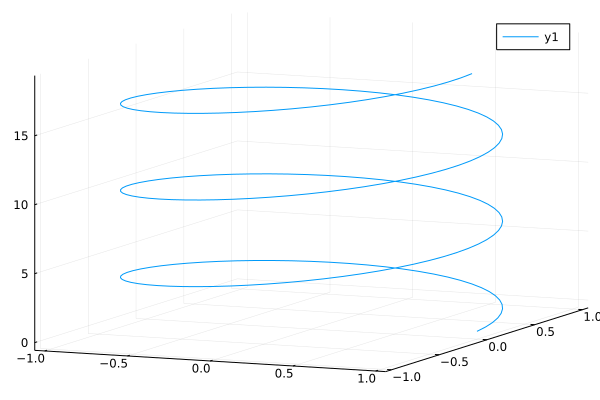

In [12]:
x  = 0:0.1:6π
y¹ = cos
y² = sin
y³ = (x -> x)
plot(y¹, y², y³, x)

On peut tracer un champ de vecteurs : $y : \mathbb R^d \rightarrow \mathbb R^d$. On appelle la fonction `quiver()`.

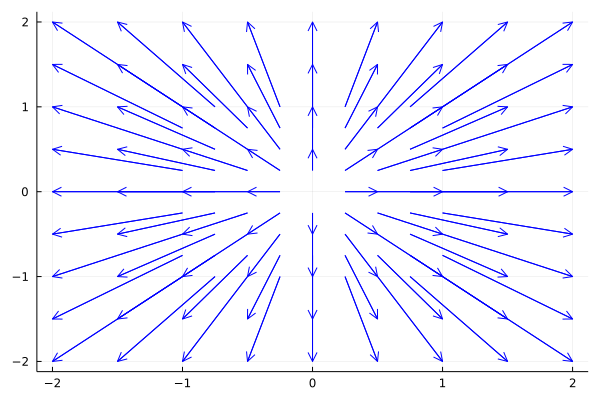

In [13]:
function meshgrid(x, y)
    x_ = zeros(length(x), length(y))
    y_ = zeros(length(x), length(y))
    
    for i ∈ 1:length(x), j ∈ 1:length(y)
        x_[i,j] = x[i]
        y_[i,j] = y[j]
    end
    
    return x_, y_
end
x = -1.0 : 0.25 : 1.0
y = -1.0 : 0.25 : 1.0
xx, yy = meshgrid(x, y)

@doc """ Champ de vecteurs identité du plan. """
function Id(x, y)
    return [x, y]
end

quiver(xx, yy, quiver=Id, color=:blue)

## Animer des graphes

On commence par animer une figure : à chaque pas de temps, un point supplémentaire construit aléatoirement arrive sur le graphe.

┌ Info: Saved animation to 
│   fn = C:\Users\julien\Documents\GitHub\Scikit\fr\visualisation\Julia\tmp.gif
└ @ Plots C:\Users\julien\.julia\packages\Plots\8ouqB\src\animation.jl:114


Plots.AnimatedGif("C:\\Users\\julien\\Documents\\GitHub\\Scikit\\fr\\visualisation\\Julia\\tmp.gif")
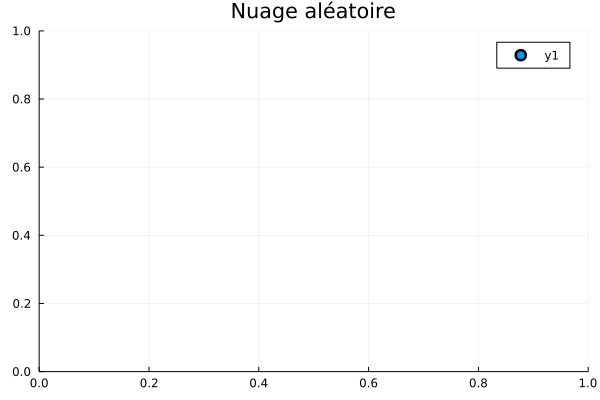

In [14]:
plt = scatter(
    1,
    xlim=(0.0, 1.0),
    ylim=(0.0, 1.0),
    title="Nuage aléatoire",
    marker=2,
)

@gif for i=1:100
    x, y = rand(2)
    push!(plt, x, y)
end every 1

┌ Info: Saved animation to 
│   fn = C:\Users\julien\Documents\GitHub\Scikit\fr\visualisation\Julia\tmp.gif
└ @ Plots C:\Users\julien\.julia\packages\Plots\8ouqB\src\animation.jl:114


Plots.AnimatedGif("C:\\Users\\julien\\Documents\\GitHub\\Scikit\\fr\\visualisation\\Julia\\tmp.gif")
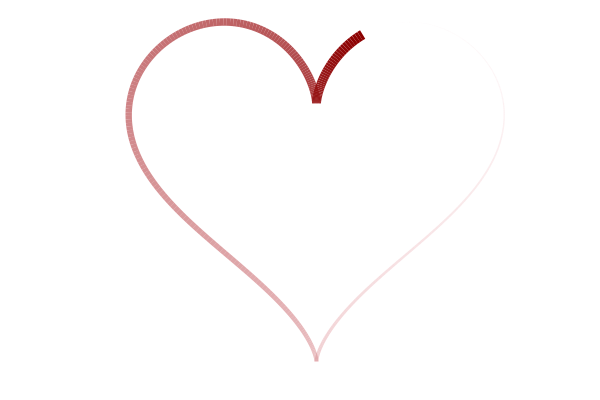

In [15]:
@userplot CirclePlot
@recipe function f(cp::CirclePlot)
    x, y, i = cp.args
    n = length(x)
    inds = circshift(1:n, 1 - i)
    linewidth --> range(0, 10, length = n)
    seriesalpha --> range(0, 1, length = n)
    aspect_ratio --> 1
    label --> false
    x[inds], y[inds]
end

n = 400
t = range(0, 2π, length = n)
x = 16sin.(t).^3
y = 13cos.(t) .- 5cos.(2t) .- 2cos.(3t) .- cos.(4t)

@gif for i ∈ 1:n
    circleplot(x, y, i, line_z = 1:n, cbar = false, c = :reds, framestyle = :none)
end when i > 40 && mod1(i, 10) == 5

## Les attributs des objets

Tout d'abord, on sait qu'on ne rend jamais un graphe sans sa documentation : au moins un titre et une légende. Une fois tracé le plot, on peut éditer quelques attributs de l'objet `current` avec `plot!()`. Par défaut, l'objet `current()` est modifié en conséquence, mais on peut spécifier le graphe si on l'a identifié au moment de l'appel.

```julia
g = plot(y)
plot!(g, ...)
```

Les attributs de la figure sont listés à l'adresse

> [https://docs.juliaplots.org/stable/generated/attributes_plot/](https://docs.juliaplots.org/stable/generated/attributes_plot/)

Ceux des séries sont ici

> [https://docs.juliaplots.org/stable/generated/attributes_series/](https://docs.juliaplots.org/stable/generated/attributes_series/)

Ceux des sous-figures

> [https://docs.juliaplots.org/stable/generated/attributes_subplot/](https://docs.juliaplots.org/stable/generated/attributes_subplot/)

Et enfin les attributs des axes sont listés là

> [https://docs.juliaplots.org/stable/generated/attributes_axis/](https://docs.juliaplots.org/stable/generated/attributes_axis/)

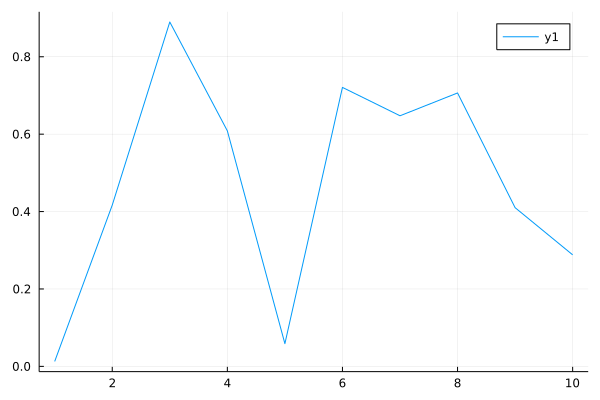

In [16]:
y = rand(10)
plot(y)

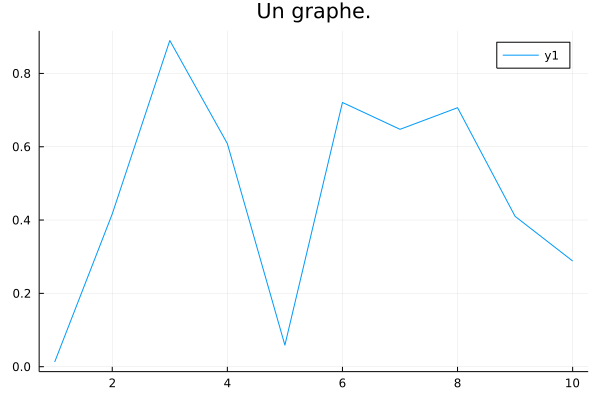

In [17]:
plot!(current(), title="Un graphe.")

## La mise en page

L'exploitation d'un code de simulation demande en général de visualiser plusieurs courbes. Il est possible de configurer une figure de sorte qu'elle intègre toutes les courbes souhaitées et de paramétrer leurs dispositions relatives.

La méthode la plus simple pour séparer les graphes est de laisser Plots.jl décider de leur répartition. Par exemple, ici, nous souhaitons visualiser quatre séries stockées de dix points.

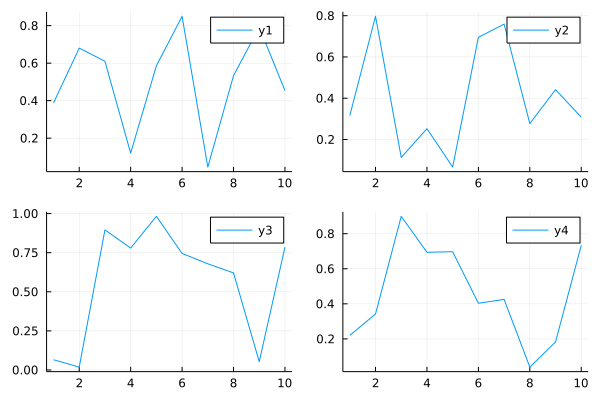

In [18]:
y = rand(10, 4)
plot(y, layout=4)

Nous aurions pu vouloir les disposer en ligne, ou en colonne, et dans ce cas `layout` sera représenté par un tuple.

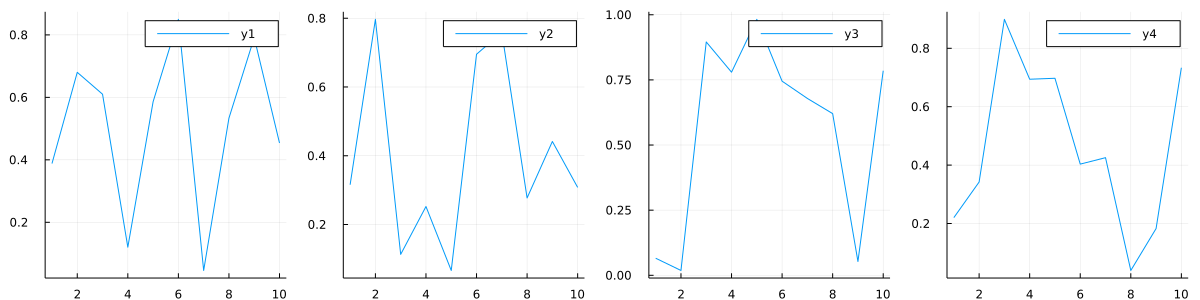

In [19]:
plot(y, layout=(1,4), size=(1200, 300))

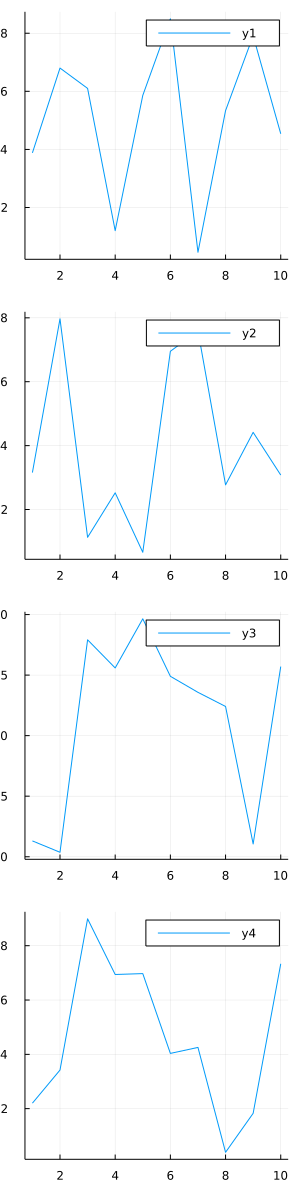

In [20]:
plot(y, layout=(4,1), size=(300, 1200))

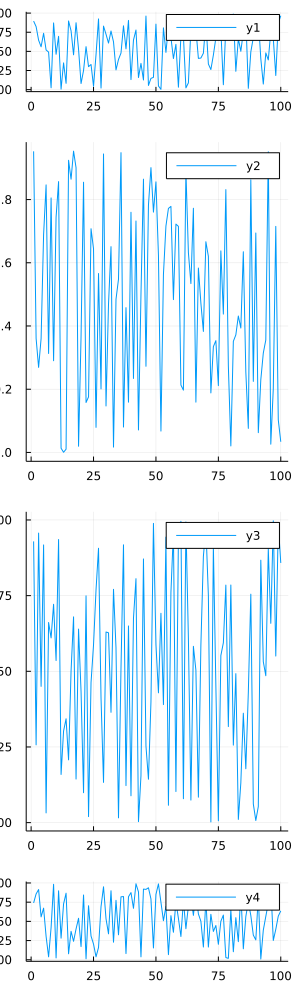

In [21]:
plot(rand(100, 4), layout = grid(4, 1, heights=[0.1 ,0.4, 0.4, 0.1]), size=(300,1000))

On peut construire une mise en page personnalisée. Imaginons maintenant que nous souhaitions afficher $11$ séries sur la même figure, et mettre en valeurs certaines.

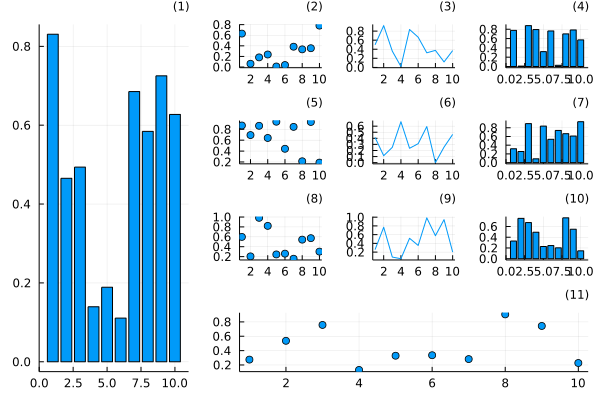

In [22]:
l = @layout [
    a{0.3w} [grid(3,3)
             b{0.2h}  ]
]

plot(
    rand(10, 11),
    layout=l, legend=false, seriestype=[:bar :scatter :path],
    title=["($i)" for j in 1:1, i in 1:11], titleloc=:right, titlefont=font(8)
)

## Rendu et export

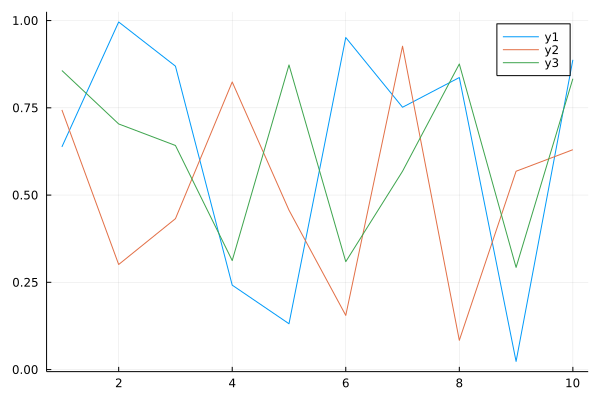

In [23]:
graphe = plot(rand(10,3))

Le rendu graphique dans un notebook se fait simplement à l'aide de `plot()`.

Il est aussi possible d'exporter une figure dans un fichier. On peut utiliser la méthode `png()`

In [24]:
png(graphe, "out/random_3")

On peut aussi appeler `savefig()`, qui supporte plus de formats dont `.html`, `.pdf`, `.png`, ce dernier étant le format par défaut.

In [25]:
savefig(graphe, "out/random_3.html")
savefig(graphe, "out/random_3.pdf")
savefig(graphe, "out/random_3.1.png")

## Référence

**[1]** *Documentation du package Plots.jl*, [https://docs.juliaplots.org/stable/](https://docs.juliaplots.org/stable/)